In [1]:
import torch
import cv2
import os
from IPython.display import Image
from matplotlib import pyplot as plt
import numpy as np

In [2]:
src = "learn/slider.jpg"
horse = "learn/horse.jpeg"
out = "learn/slider_gray.jpg"
dir = "../dataset/"
result = "../output/"

os.makedirs(os.path.dirname(result), exist_ok=True)

## Check for CUDA

In [ ]:
import torch
print("Torch version:", torch.__version__)
print("CUDA available:", torch.cuda.is_available())
print("CUDA runtime version:", torch.version.cuda)
print("CUDA device count:", torch.cuda.device_count())


if torch.cuda.is_available():
    print("CUDA available with GPU:", torch.cuda.get_device_name(0))
    print("CUDA runtime:", torch.version.cuda)
    print("Torch:", torch.__version__)

Torch version: 2.9.1+cpu
CUDA available: False
CUDA runtime version: None
CUDA device count: 0
iGPU name: No GPU


## Grayscale

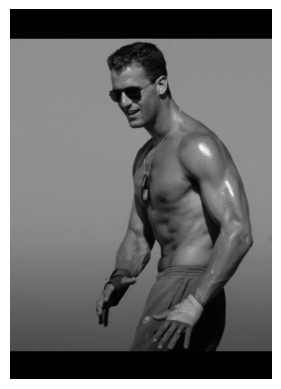

In [9]:
img = cv2.imread(dir + src)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

cv2.imwrite(result + out, gray)

plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

## Matrix 

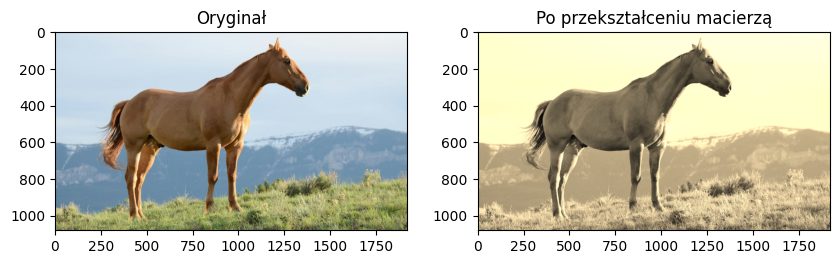

In [10]:
img = cv2.imread(dir + horse)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_float = img.astype(np.float32) / 255.0

trans = np.array([
    [0.393, 0.769, 0.189],
    [0.349, 0.689, 0.168],
    [0.272, 0.534, 0.131]
])

h, w, c = img_float.shape

img_transformed = np.dot(img_float.reshape(-1, 3), trans.T)
img_transformed = np.clip(img_transformed, 0, 1)
img_transformed = img_transformed.reshape(h, w, 3)

# Show
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(img_float)
plt.title("Oryginał")

plt.subplot(1,2,2)
plt.imshow(img_transformed)
plt.title("Po przekształceniu macierzą")
plt.show()

## Use camera (I don't know why I do this)

In [11]:
cap = cv2.VideoCapture(0)

while True:
    timer = cv2.getTickCount()
    success, img = cap.read()
    
    fps = cv2.getTickFrequency() / (cv2.getTickCount()-timer)
    cv2.putText(img, str(int(fps)), (20, 20), cv2.FONT_HERSHEY_DUPLEX, 0.7, (65, 45, 10), 1)
    cv2.imshow("Tracking", img)
    
    if cv2.waitKey(1) & 0xff == ord('q') or cv2.getWindowProperty("Tracking", cv2.WND_PROP_VISIBLE) < 1:
        break
    
cv2.destroyAllWindows()
cap.release()